## Credit Card Fraud Detection

In this project we have predicted fraudulent credit card transactions with the help of Machine learning models. 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

from termcolor import colored

## 1. Exploratory data analysis

### a. Understanding variables

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.shape

(284807, 31)

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.nunique(axis=0)

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [7]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,88.349619,0.001727
std,47488.145955,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,...,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109,0.041527
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54201.500000,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,...,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000,0.000000
50%,84692.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,...,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000,0.000000
75%,139320.500000,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,...,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


### b. Cleaning the data set

In [8]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


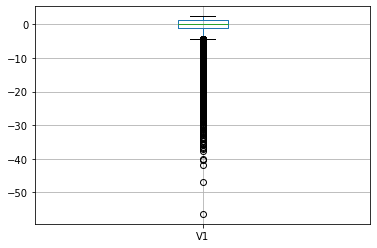

In [9]:
# Outliers check
print(df.boxplot(column='V1'))

AxesSubplot(0.125,0.125;0.775x0.755)


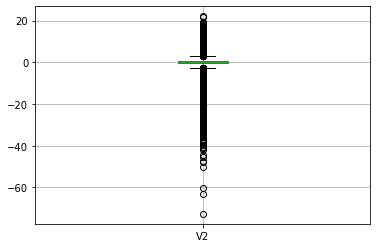

In [10]:
# Outliers check
print(df.boxplot(column='V2'))

###### OBSERVATIONS
######  1. Though there seems to be outliers, the data is PCA transfrmed and hence we need not do any more outlier treatment.
###### 2. e also do not have to do variable selection or feature reduction as the data is PCA transformed.
###### 3. There are no rows with null values, so no data reduction required.

### c. Analyzing relationship

Here we will observe the distribution of our classes

In [11]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(colored("normal_share:", "blue", attrs=["bold"]))
print(normal_share)
print("\n")
print(colored("fraud_share:", "blue", attrs=["bold"]))
print(fraud_share)

normal_share:
99.82725143693798


fraud_share:
0.1727485630620034


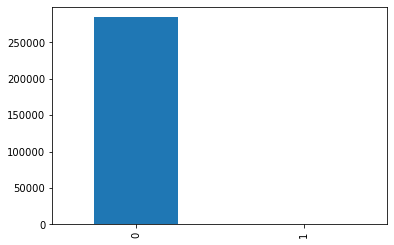

In [12]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

# plot
df["Class"].value_counts().plot.bar()
plt.show()

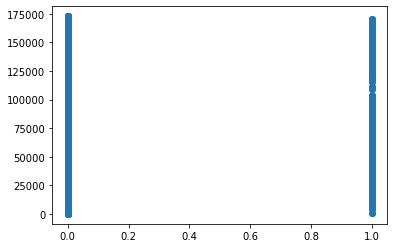

In [13]:
# Create a scatter plot to observe the distribution of classes with time
plt.scatter(df["Class"],df["Time"])
plt.show()

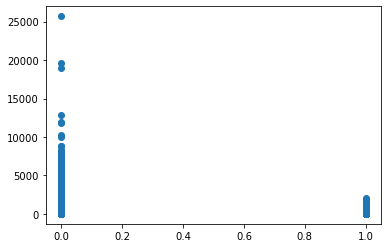

In [14]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.scatter(df["Class"],df["Amount"])
plt.show()

In [15]:
df_fraud = df[df.Class == 1]
df_normal = df[df.Class == 0]

In [16]:
df_fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
df_normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

C:\Users\Aadi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Aadi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


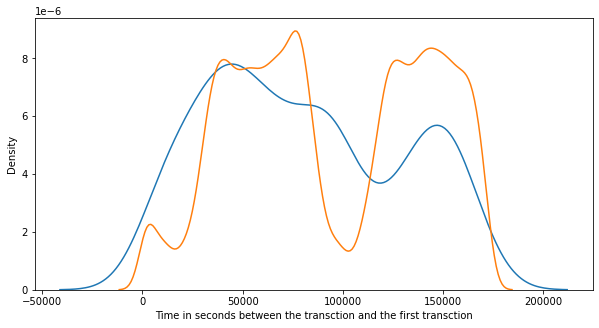

In [18]:
plt.figure(figsize=(10,5))
ax = sns.distplot(df_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(df_normal['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Time in seconds between the transction and the first transction')
plt.show()

<AxesSubplot:>

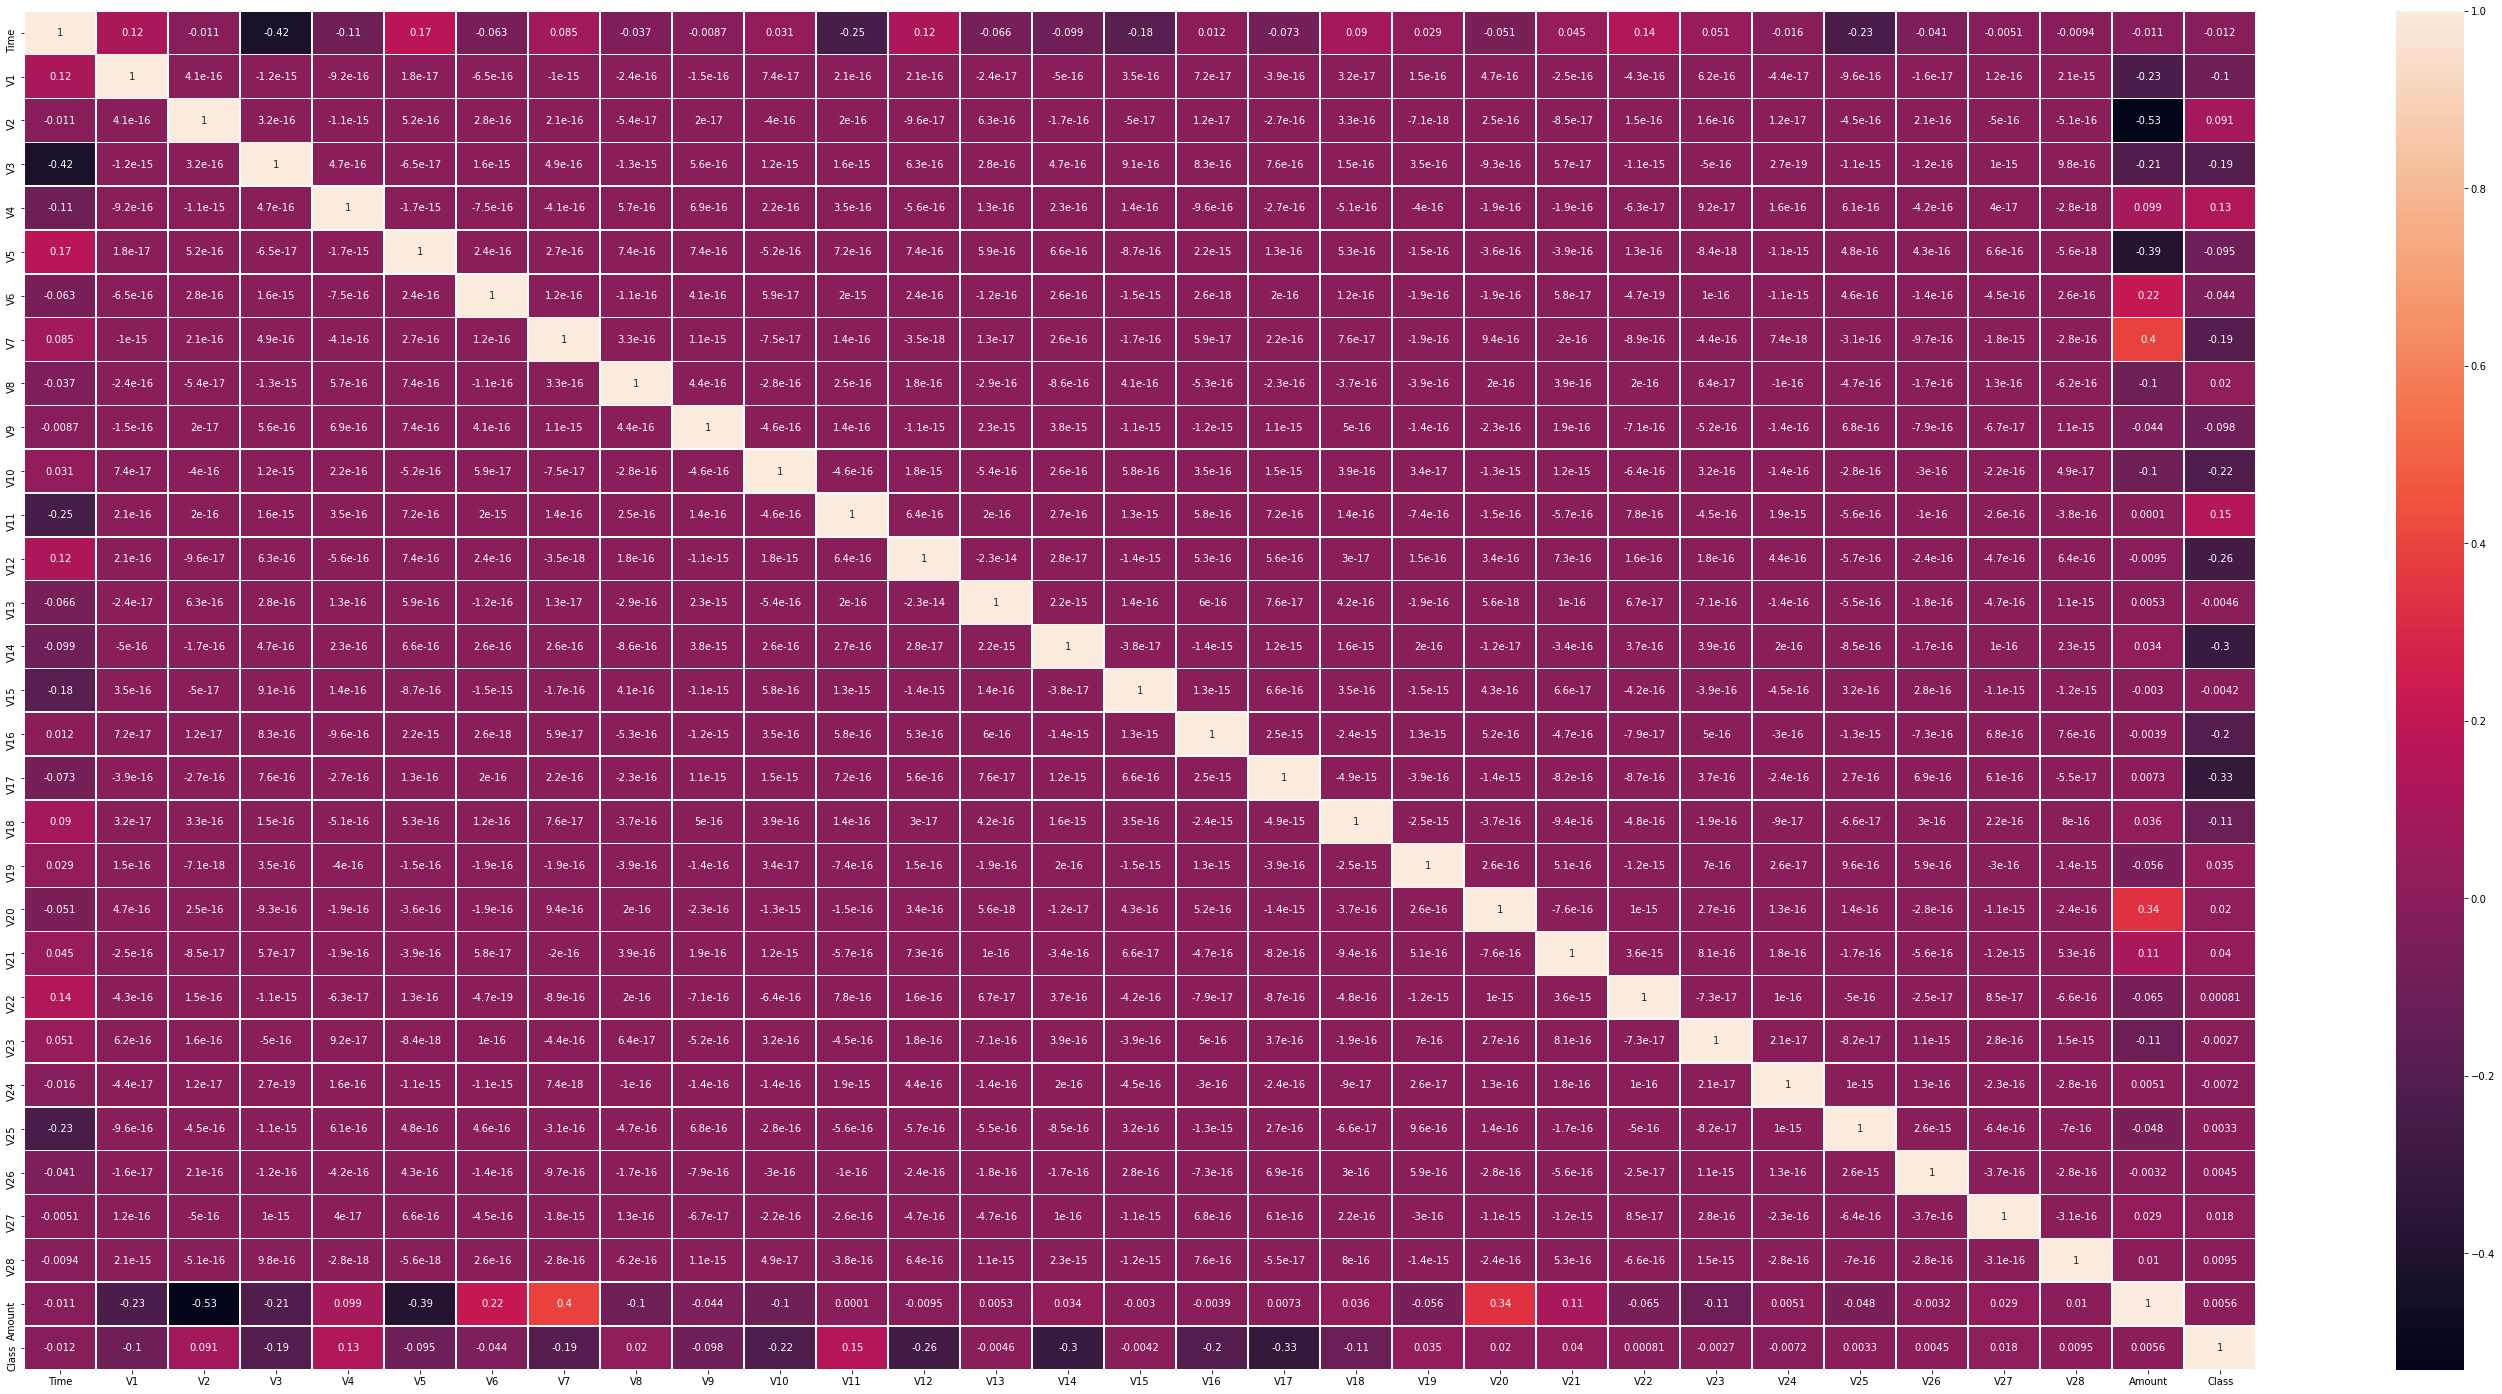

In [19]:
# calculate correlation matrix
plt.subplots(figsize=(50,25))
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.5)

In [20]:
# Dropping time as there is no corelation between Class and Time elapsed.
df.drop('Time', axis=1, inplace=True)

In [21]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


###### OBSERVATIONS
######  1. The fraudant transaction share is .172 % while the normal trasaction is 99.82%
######  2. The fraudant transaction has happened with lower amounts of transaction. Normal transaction ranges from 0-25691, fraudant transaction ranges from 0- 2125 
######  3. The fraudant transactions have no pattern with time elapsed. So deleted the time column to reduce any noise that it might create.
###### 4. As PCA is already done, the correlation between the pricipal components are reduced to a great extent


### d. Feature Selection 

In [22]:
# Trying out ExtraTreesClassifier for feature selection
x_fs = df.drop('Class', axis = 'columns')
y_fs = df['Class']

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x_fs, y_fs)

ExtraTreesClassifier()

In [24]:
model.feature_importances_

array([0.01274629, 0.01393447, 0.03455993, 0.03377082, 0.01359772,
       0.01380066, 0.02476954, 0.01396187, 0.03756794, 0.07232901,
       0.0681026 , 0.10580047, 0.01303314, 0.15131052, 0.01199399,
       0.06083297, 0.12797828, 0.04443445, 0.01583527, 0.013476  ,
       0.01672616, 0.01349392, 0.00948458, 0.01236718, 0.01081466,
       0.01571477, 0.01376722, 0.01095498, 0.01284058])

<AxesSubplot:>

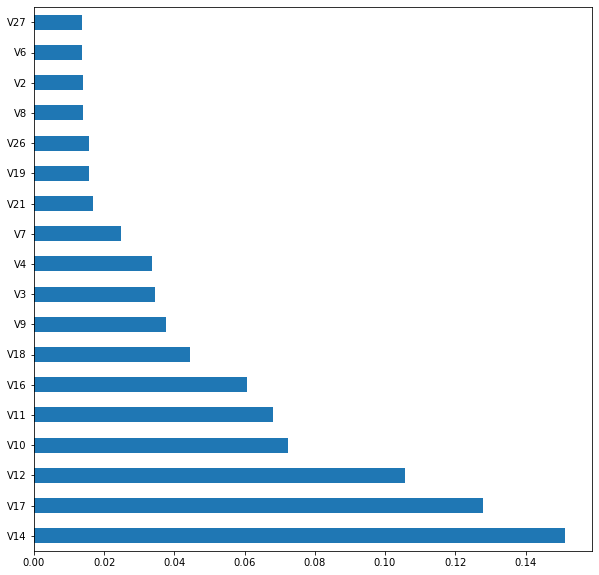

In [25]:
plt.figure(figsize = (10,10))
feat = pd.Series(model.feature_importances_, index = x_fs.columns)
feat.nlargest(18).plot(kind = 'barh')

In [26]:
# Trying out PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

In [27]:
pca.fit(x_fs)

PCA(random_state=42)

In [28]:
pca.components_

array([[-1.78322294e-03, -3.50839517e-03, -1.27837144e-03,
         5.58889315e-04, -2.13201563e-03,  1.15041177e-03,
         1.96506336e-03, -4.92204583e-04, -1.94340470e-04,
        -4.41859173e-04,  4.24307536e-07, -3.81173631e-05,
         2.10628711e-05,  1.29349023e-04, -1.09263994e-05,
        -1.36959278e-05,  2.48186427e-05,  1.19463813e-04,
        -1.82742240e-04,  1.04608011e-03,  3.11274610e-04,
        -1.88006789e-04, -2.81192640e-04,  1.24607097e-05,
        -9.96934250e-05, -6.18479087e-06,  4.65153221e-05,
         1.35371917e-05,  9.99985487e-01],
       [-9.80433374e-01,  1.72567606e-01,  4.42815127e-02,
        -1.60858256e-02,  5.80420947e-02, -2.92504999e-02,
        -4.44477841e-02,  1.06342606e-02,  3.83575233e-03,
         8.64819658e-03, -7.86315145e-06,  6.95207483e-04,
        -3.83065148e-04, -2.29279454e-03,  1.88275355e-04,
         2.30451122e-04, -4.11191015e-04, -1.96700563e-03,
         2.96998210e-03, -1.66325238e-02, -4.86462522e-03,
         2.92

In [29]:
pca.explained_variance_ratio_

array([9.99538016e-01, 5.98389764e-05, 3.89223784e-05, 3.52277435e-05,
       3.19393954e-05, 2.89369713e-05, 2.65990695e-05, 2.28725408e-05,
       1.93617816e-05, 1.91173325e-05, 1.66454989e-05, 1.59551214e-05,
       1.58273371e-05, 1.47614475e-05, 1.34004927e-05, 1.33414159e-05,
       1.22664499e-05, 1.15239480e-05, 1.11996856e-05, 1.05522684e-05,
       8.69556251e-06, 8.43642066e-06, 6.43786275e-06, 5.86073004e-06,
       4.39641289e-06, 3.71557695e-06, 2.64706259e-06, 1.81033817e-06,
       1.69379866e-06])

<BarContainer object of 29 artists>

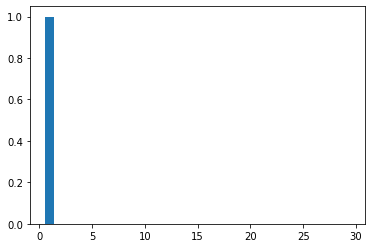

In [30]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

###### OBSERVATIONS
###### 1. Tried out ExtraTreesClassifier and from the graph it appears that there are certain variables which have very less say and do not have much importance. 
###### 2. Tried out PCA as well and from the graph it again looks like a couple of features explain the most of the data and there are many features that can be removed.
###### 3. Though both the feature reduction techniques suggest that feature reduction can be done as there are multiple features that have very less say (they are so very less that they dnt even appear in the chart above), however I will choose NOT TO GO FOR feature reduction as the data is already PCA transformed.

## 2. Model Building

##### 1. Splitting the data into train & test data

In [31]:
y= df['Class']

In [32]:
X = df.drop(['Class'], axis=1)

In [33]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [35]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


###### 2. Scaling

In [36]:
# Scaling the amount column before fixing skewness
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [37]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

<ipython-input-37-11b47c18023d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])


In [38]:
X_train.head() # Check for scaling

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,...,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,...,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,...,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,...,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,...,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109


In [39]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

<ipython-input-39-d99d69664984>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Amount'] = scaler.transform(X_test[['Amount']])


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,...,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.340485
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,...,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.320859
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,...,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.853442
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,...,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.344410
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,...,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.229480


###### 3. Check for skewness

In [40]:
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

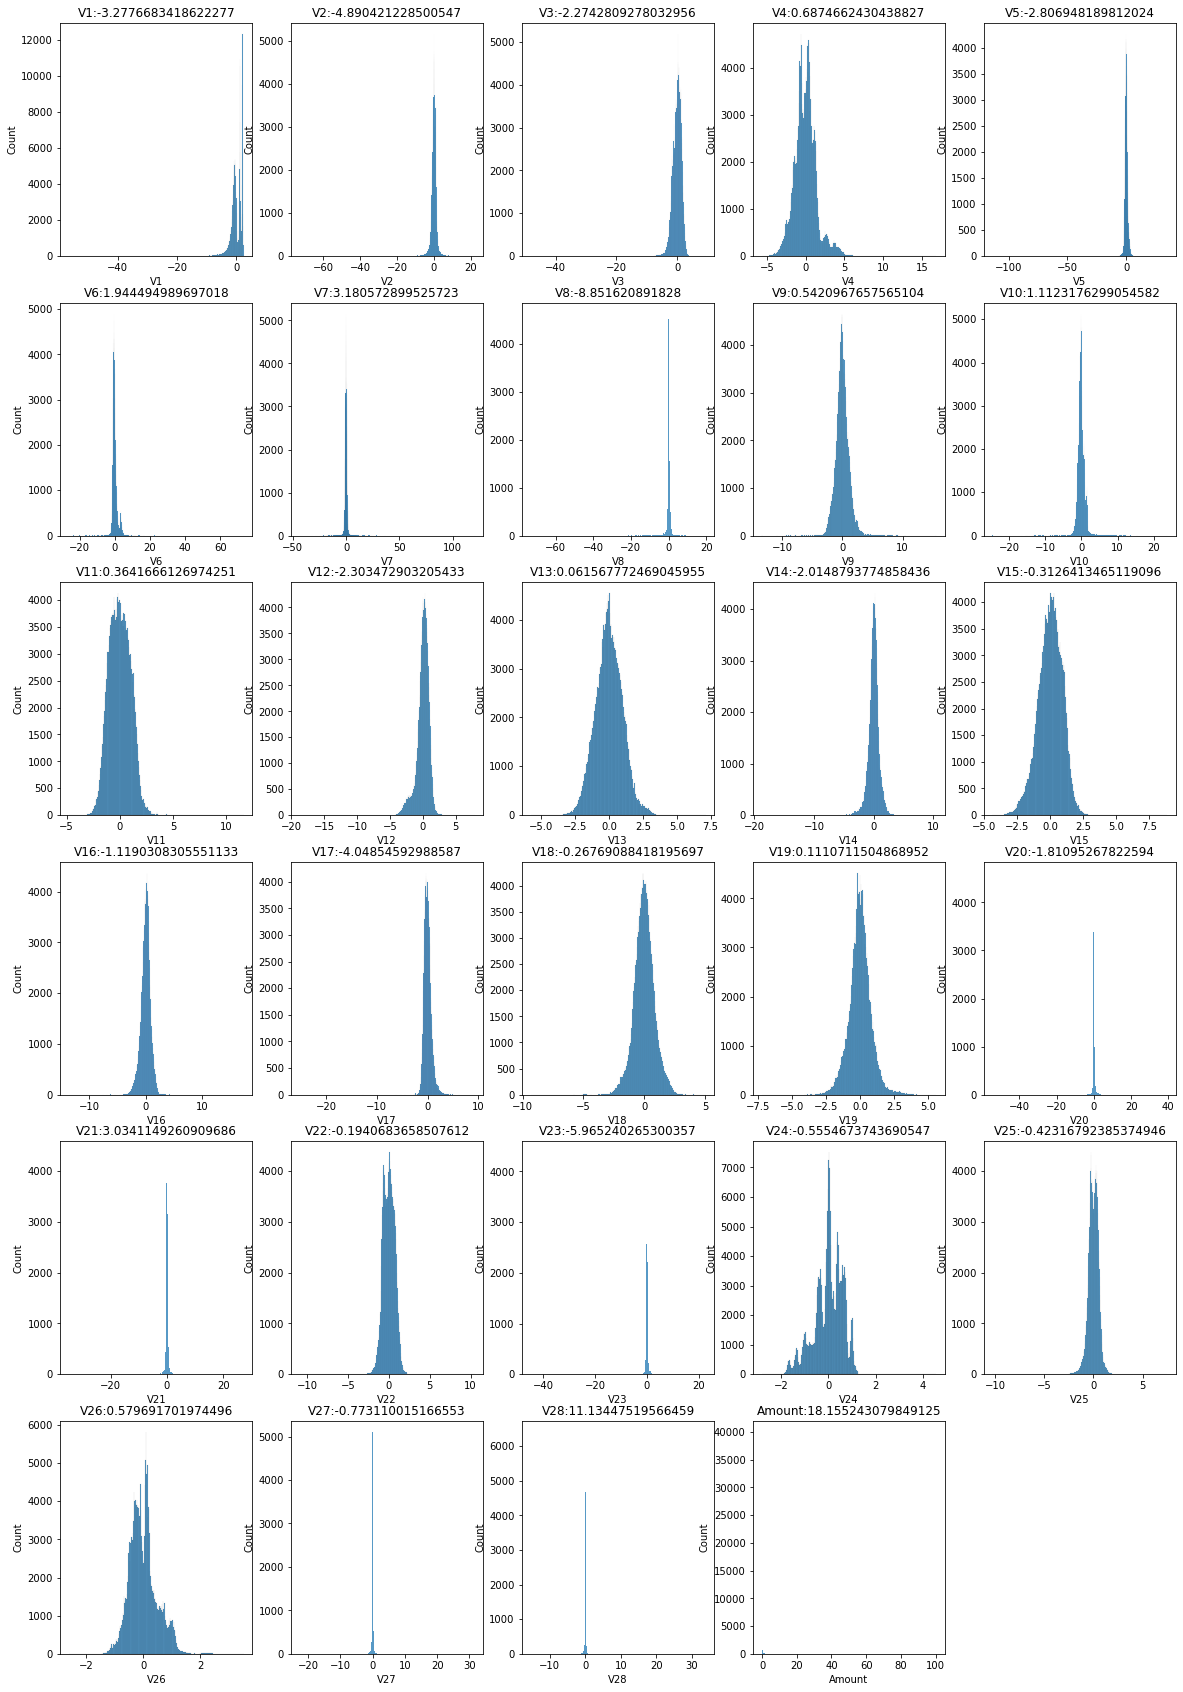

In [41]:
# plot the histogram of a variable from the dataset to see the skewness
n=1
plt.figure(figsize=(20,30))
for col in cols :    
    plt.subplot(6, 5,n)    
    sns.histplot(X_train[col])
    plt.title(col+':'+str(X_train[col].skew()))
    n=n+1

In [42]:
X_train.skew(axis = 0, skipna = True)

V1        -3.277668
V2        -4.890421
V3        -2.274281
V4         0.687466
V5        -2.806948
V6         1.944495
V7         3.180573
V8        -8.851621
V9         0.542097
V10        1.112318
V11        0.364167
V12       -2.303473
V13        0.061568
V14       -2.014879
V15       -0.312641
V16       -1.119031
V17       -4.048546
V18       -0.267691
V19        0.111071
V20       -1.810953
V21        3.034115
V22       -0.194068
V23       -5.965240
V24       -0.555467
V25       -0.423168
V26        0.579692
V27       -0.773110
V28       11.134475
Amount    18.155243
dtype: float64

###### Skewness is present so using  <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [43]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

X_train[cols] = pt.fit_transform(X_train)

<ipython-input-43-b6510f039246>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cols] = pt.fit_transform(X_train)
C:\Users\Aadi\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Aadi\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [44]:
# plot the histogram of a variable from the dataset again to see the result
X_train.skew(axis = 0, skipna = True)

V1       -0.218078
V2        0.341223
V3       -0.081054
V4        0.019541
V5       -1.300984
V6       -2.027134
V7        2.870413
V8        2.242749
V9       -0.051976
V10      -1.285471
V11       0.062395
V12       0.160914
V13       0.006460
V14       0.107647
V15       0.013333
V16       0.165158
V17      -0.768039
V18      -0.061821
V19       0.014897
V20      -1.047089
V21      -1.890567
V22      -0.022394
V23      -0.308486
V24       0.113646
V25       0.083366
V26      -0.024907
V27       3.533355
V28       1.484209
Amount    0.709380
dtype: float64

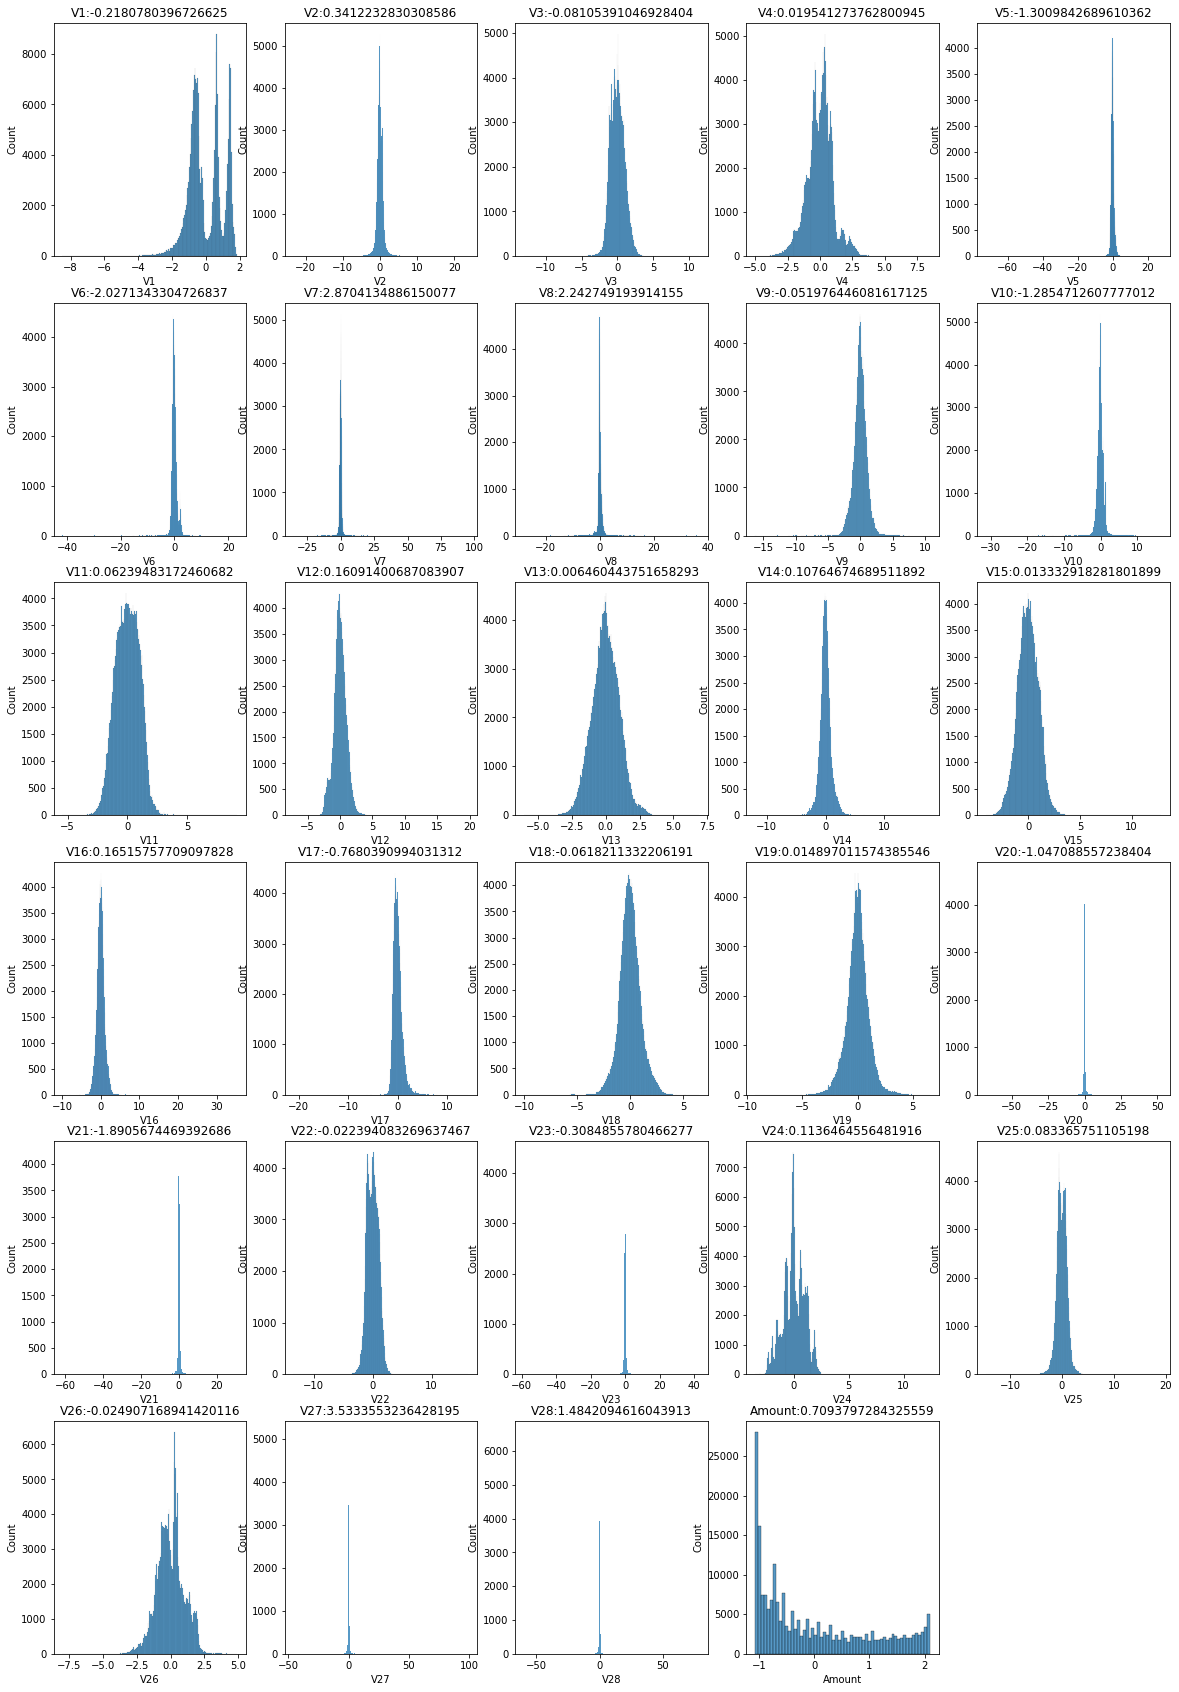

In [45]:
# plot the histogram of a variable from the dataset to see the skewness
n=1
plt.figure(figsize=(20,30))
for col in cols :    
    plt.subplot(6, 5,n)    
    sns.histplot(X_train[col])
    plt.title(col+':'+str(X_train[col].skew()))
    n=n+1

In [46]:
X_test = pt.transform(X_test)

###### 4. Models Building with Class Imbalance

#### Model 1  - Logistic Regression

In [47]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [48]:
# Use k-fold cross validation to choose the optimal C, then build the final LR model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [49]:
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# choosing different values of C as a regulaization hyperparameter, the higher the value of C, lesser the regularization
params = {"C": [0.01, 0.1, 1, 10, 100]}

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [50]:
cv_df = pd.DataFrame(model_cv.cv_results_)
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.795381,0.065219,0.018738,0.006235,0.01,{'C': 0.01},0.986856,0.987234,0.968390,0.982373,...,0.983719,0.008479,1,0.984043,0.984587,0.988474,0.985596,0.983075,0.985155,0.001849
1,1.112159,0.154156,0.015784,0.007013,0.1,{'C': 0.1},0.986104,0.987144,0.960929,0.980620,...,0.981416,0.010893,2,0.982402,0.983785,0.987917,0.984018,0.981187,0.983862,0.002270
2,1.085004,0.069917,0.016928,0.002602,1,{'C': 1},0.985834,0.986806,0.958452,0.979781,...,0.980484,0.011635,3,0.981722,0.983322,0.987492,0.983305,0.980489,0.983266,0.002365
3,1.161642,0.124178,0.016923,0.002611,10,{'C': 10},0.985798,0.986754,0.958181,0.979674,...,0.980375,0.011715,4,0.981632,0.983262,0.987435,0.983216,0.980404,0.983190,0.002375
4,1.214088,0.144839,0.015624,0.000007,100,{'C': 100},0.985793,0.986748,0.958155,0.979666,...,0.980365,0.011722,5,0.981625,0.983256,0.987429,0.983207,0.980396,0.983182,0.002376


In [51]:
# Best value of C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9837192853831933 at C = 0.01


In [52]:
# Building LR with optimal C
logistic_reg_1 = LogisticRegression(C=0.01)

In [53]:
model1 = logistic_reg_1.fit(X_train, y_train)

In [54]:
y_train_pred = model1.predict(X_train)

In [55]:
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion_matrix)

[[227427     22]
 [   135    261]]


In [56]:
TP = confusion_matrix[1,1] # true positives 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [57]:
# Accuracy
auccuracy = metrics.accuracy_score(y_train, y_train_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_train = f1_score(y_train, y_train_pred)
print("F1-Score:",f1_score_train )

Accuracy: 0.9993109350655051
Sensitivity 0.6590909090909091
Specificity 0.9999032750198946
F1-Score: 0.7687776141384388


In [58]:
y_train_predict_proba = model1.predict_proba(X_train)[:,1]

In [59]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_train, y_train_predict_proba)

In [60]:
print(auc_score)

0.9850627519962183


In [61]:
#summary_df = pd.DataFrame([{'Model':'Linear Regression', 'Class':'Imbalanced', 'Train/Test':'Train', 'Accuracy':auccuracy, 'Sensitivity':sensitivity, 'Specificity':specificity, 'F1-Score':f1_score_train, 'AUC-ROC':auc_score}])

In [62]:
#summary_df.head()

,Model,Class,Train/Test,Accuracy,Sensitivity,Specificity,F1-Score,AUC-ROC
0,Linear Regression,Imbalanced,Train,0.999311,0.659091,0.999903,0.768778,0.985063


In [63]:
# prediction on test set
y_test_pred = model1.predict(X_test)

In [64]:
# Confusion matrix
confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_test)

[[56850    16]
 [   42    54]]


In [65]:
TP = confusion_matrix_test[1,1] # true positive 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0] # false negatives

In [66]:
# Accuracy
auccuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_test = f1_score(y_test, y_test_pred)
print("F1-Score:",f1_score_test )

#Precision = TP/(TP+FP)
precision = TP/float(TP+FP)
print("Precision",precision )

Accuracy: 0.9989817773252344
Sensitivity 0.5625
Specificity 0.9997186367952731
F1-Score: 0.6506024096385543


In [67]:
y_test_predict_proba = model1.predict_proba(X_test)[:,1]

In [68]:
auc_score = roc_auc_score(y_test, y_test_predict_proba)
print (auc_score)

0.9668121475632775


In [69]:
summary_df = pd.DataFrame([{'Model':'Linear Regression', 'Class':'Imbalanced',  'Accuracy':auccuracy, 'Sensitivity':sensitivity, 'Specificity':specificity, 'F1-Score':f1_score_train, 'AUC-ROC':auc_score, 'Precision':precision}])

In [70]:
#smmary_df = summary_df.append(dict, ignore_index = True)

In [71]:
summary_df.head()

,Model,Class,Train/Test,Accuracy,Sensitivity,Specificity,F1-Score,AUC-ROC
0,Linear Regression,Imbalanced,Train,0.999311,0.659091,0.999903,0.768778,0.985063
1,Linear Regression,Imbalanced,Test,0.998982,0.562500,0.999719,0.650602,0.966812


#### Model 2 - XGBoost

In [72]:
!pip install xgboost

In [73]:
from xgboost import XGBClassifier

In [74]:
folds = 2

In [75]:
#Hyperparameter Tuning
params = {'learning_rate': [0.2, 0.6],'subsample': [0.3, 0.6]}
xgb_model = XGBClassifier(max_depth=2, n_estimators=100)
model_cross_validation = GridSearchCV(estimator = xgb_model,param_grid = params, scoring= 'roc_auc', cv = folds, verbose = 1, return_train_score=True)      
model_cross_validation.fit(X_train, y_train)     

Fitting 2 folds for each of 4 candidates, totalling 8 fits


C:\Users\Aadi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:48:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aadi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:48:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aadi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:48:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aadi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:48:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aadi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:48:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aadi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:48:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aadi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:49:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aadi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:49:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aadi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:49:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=No

In [76]:
results = pd.DataFrame(model_cross_validation.cv_results_)

In [77]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,7.813821,0.252702,0.140684,0.010133,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.963360,0.971415,0.967387,0.004027,3,0.997584,0.999312,0.998448,8.637591e-04
1,10.935477,0.071633,0.130978,0.000254,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.975400,0.976207,0.975804,0.000404,1,0.999605,0.999781,0.999693,8.807748e-05
2,7.385426,0.178845,0.135920,0.005401,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.961144,0.967555,0.964350,0.003205,4,0.999612,0.999974,0.999793,1.812603e-04
3,10.906866,0.157801,0.124567,0.006041,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.974585,0.971645,0.973115,0.001470,2,0.999999,1.000000,1.000000,2.664612e-07


In [78]:
model_cross_validation.best_params_

{'learning_rate': 0.2, 'subsample': 0.6}

In [79]:
params = {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators':100, 'subsample':0.6, 'objective':'binary:logistic'}

In [80]:
model_xg = XGBClassifier(params = params)
model_xg.fit(X_train, y_train)

C:\Users\Aadi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:49:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:49:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 100,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [81]:
y_train_pred = model_xg.predict(X_train)

In [82]:
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion_matrix)

[[227449      0]
 [     0    396]]


In [83]:
TP = confusion_matrix[1,1] # true positives 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [84]:
# Accuracy
auccuracy = metrics.accuracy_score(y_train, y_train_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_train = f1_score(y_train, y_train_pred)
print("F1-Score:",f1_score_train)

Accuracy: 1.0
Sensitivity 1.0
Specificity 1.0
F1-Score: 1.0


In [85]:
y_test_pred = model_xg.predict(X_test)

In [86]:
confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_test)

[[56859     7]
 [   24    72]]


In [87]:
TP = confusion_matrix_test[1,1] # true positives 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0] # false negatives

In [88]:
# Accuracy
auccuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_test = f1_score(y_test, y_test_pred)
print("F1-Score:",f1_score_test) 

#Precision = TP/(TP+FP)
precision = TP/float(TP+FP)
print("Precision",precision )

Accuracy: 0.9994557775359011
Sensitivity 0.75
Specificity 0.999876903597932
F1-Score: 0.8228571428571428


In [89]:
y_test_pred_proba = model_xg.predict_proba(X_test)[:,1]

In [90]:
auc_score = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc_score

0.9785370798602564

In [91]:
dict = {'Model':'XGBoost', 'Class':'Imbalanced', 'Accuracy':auccuracy, 'Sensitivity':sensitivity, 'Specificity':specificity, 'F1-Score':f1_score_test, 'AUC-ROC':auc_score, 'Precision':precision}

In [92]:
summary_df = summary_df.append(dict, ignore_index = True)

In [93]:
summary_df.head()

,Model,Class,Train/Test,Accuracy,Sensitivity,Specificity,F1-Score,AUC-ROC
0,Linear Regression,Imbalanced,Train,0.999311,0.659091,0.999903,0.768778,0.985063
1,Linear Regression,Imbalanced,Test,0.998982,0.562500,0.999719,0.650602,0.966812
2,XGBoost,Imbalanced,Test,0.999456,0.750000,0.999877,0.822857,0.978537


In [94]:
#Dropping train data from summary
#summary_df = summary_df[summary_df['Train/Test'] != 'Train']

In [95]:
#summary_df.drop('Train/Test', axis=1, inplace=True)

In [96]:
#summary_df.head()

,Model,Class,Accuracy,Sensitivity,Specificity,F1-Score,AUC-ROC
1,Linear Regression,Imbalanced,0.998982,0.5625,0.999719,0.650602,0.966812
2,XGBoost,Imbalanced,0.999456,0.7500,0.999877,0.822857,0.978537


### Model 3  - Decision Tree

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
params = {'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50),'min_samples_split': range(50, 150, 50)}

dec_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dec_tree, param_grid = params, scoring= 'roc_auc', cv = 3,verbose = 1)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [99]:
cross_validation_results = pd.DataFrame(grid_search.cv_results_)
cross_validation_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.366226,0.096402,0.031811,0.011156,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933337,0.933183,0.923873,0.930131,0.004426,4
1,3.337918,0.100823,0.020855,0.000868,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933337,0.933183,0.923868,0.930129,0.004428,5
2,3.286535,0.037524,0.024917,0.004813,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933297,0.936720,0.944598,0.938205,0.004732,1
3,3.415077,0.049464,0.029031,0.000978,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933297,0.936720,0.944598,0.938205,0.004732,1
4,6.517609,0.045433,0.026604,0.004657,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.924916,0.923896,0.930485,0.926432,0.002896,6
5,6.515686,0.119140,0.030386,0.000030,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.917467,0.923897,0.930495,0.923953,0.005319,8
6,6.516700,0.065149,0.034357,0.005755,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.933451,0.919684,0.921765,0.924967,0.006059,7
7,6.592166,0.109392,0.027659,0.003727,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.933441,0.919684,0.944098,0.932408,0.009994,3


In [100]:
print("Best ROC", grid_search.best_score_)
print(grid_search.best_estimator_)

Best ROC 0.9382050164508641
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


In [101]:
# Building DT with the best estimator
model_dt = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=100, min_samples_split=100)

In [102]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

In [103]:
y_train_pred = model_dt.predict(X_train)

In [104]:
confusion_matrix_train = metrics.confusion_matrix(y_train, y_train)
print(confusion_matrix_train)

[[227449      0]
 [     0    396]]


In [105]:
TP = confusion_matrix_train[1,1] # true positives 
TN = confusion_matrix_train[0,0] # true negatives
FP = confusion_matrix_train[0,1] # false positives
FN = confusion_matrix_train[1,0] # false negatives

In [106]:
# Accuracy
auccuracy = metrics.accuracy_score(y_train, y_train_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_train = f1_score(y_train, y_train_pred)
print("F1-Score:",f1_score_train) 

Accuracy: 0.9991704887094297
Sensitivity 1.0
Specificity 1.0
F1-Score: 0.7490039840637449


In [107]:
y_train_pred_proba = model_dt.predict_proba(X_train)[:,1]
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9534547393930157

In [108]:
y_test_pred = model_dt.predict(X_test)

In [109]:
confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_test)

[[56836    30]
 [   40    56]]


In [110]:
TP = confusion_matrix_test[1,1] # true positives 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0] # false negatives

In [111]:
# Accuracy
auccuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_test = f1_score(y_test, y_test_pred)
print("F1-Score:",f1_score_test)

#Precision = TP/(TP+FP)
precision = TP/float(TP+FP)
print("Precision",precision )

Accuracy: 0.9987711105649381
Sensitivity 0.5833333333333334
Specificity 0.9994724439911371
F1-Score: 0.6153846153846155


In [112]:
y_test_pred_proba = model_dt.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.92174979703748

In [113]:
dict = {'Model':'Decision Tree', 'Class':'Imbalanced', 'Accuracy':auccuracy, 'Sensitivity':sensitivity, 'Specificity':specificity, 'F1-Score':f1_score_test, 'AUC-ROC':auc, 'Precision':precision}

In [114]:
summary_df = summary_df.append(dict, ignore_index = True)

In [115]:
summary_df.head()

,Model,Class,Accuracy,Sensitivity,Specificity,F1-Score,AUC-ROC
0,Linear Regression,Imbalanced,0.998982,0.562500,0.999719,0.650602,0.966812
1,XGBoost,Imbalanced,0.999456,0.750000,0.999877,0.822857,0.978537
2,Decision Tree,Imbalanced,0.998771,0.583333,0.999472,0.615385,0.921750


### Model 4 - Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
params = {'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50),'min_samples_split': range(50, 150, 50), 'n_estimators': [100,200,300], 'max_features': [10, 15]}

rand_forest = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rand_forest, param_grid = params, n_jobs = -1, cv = 2,verbose = 1, return_train_score=True)
grid_search.fit(X_train,y_train)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5), 'max_features': [10, 15],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [118]:
#best score
print(grid_search.best_score_)
print(grid_search.best_params_)

0.9993021571489741
{'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 200}


In [119]:
model_rf = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=15,
                             n_estimators=100)

In [120]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=15, min_samples_leaf=50,
                       min_samples_split=100)

In [121]:
y_train_pred = model_rf.predict(X_train)

In [122]:
confusion_matrix_train = metrics.confusion_matrix(y_train, y_train)
print(confusion_matrix_train)

[[227449      0]
 [     0    396]]


In [123]:
TP = confusion_matrix_train[1,1] # true positives 
TN = confusion_matrix_train[0,0] # true negatives
FP = confusion_matrix_train[0,1] # false positives
FN = confusion_matrix_train[1,0] # false negatives

In [124]:
# Accuracy
auccuracy = metrics.accuracy_score(y_train, y_train_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_train = f1_score(y_train, y_train_pred)
print("F1-Score:",f1_score_train) 

Accuracy: 0.9993460466545239
Sensitivity 1.0
Specificity 1.0
F1-Score: 0.8010680907877169


In [125]:
y_train_pred_proba = model_rf.predict_proba(X_train)[:,1]

In [126]:
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.97768798852943

In [127]:
y_test_pred = model_rf.predict(X_test)

In [128]:
confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_test)

[[56840    26]
 [   34    62]]


In [129]:
TP = confusion_matrix_test[1,1] # true positives 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0] # false negatives

In [130]:
# Accuracy
auccuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_test = f1_score(y_test, y_test_pred)
print("F1-Score:",f1_score_test) 

#Precision = TP/(TP+FP)
precision = TP/float(TP+FP)
print("Precision",precision )

Accuracy: 0.9989466661985184
Sensitivity 0.6458333333333334
Specificity 0.9995427847923188
F1-Score: 0.6739130434782609


In [131]:
y_test_pred_proba = model_rf.predict_proba(X_test)[:,1]

In [132]:
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9593355981605879

In [133]:
dict = {'Model':'Random Forest', 'Class':'Imbalanced', 'Accuracy':auccuracy, 'Sensitivity':sensitivity, 'Specificity':specificity, 'F1-Score':f1_score_test, 'AUC-ROC':auc, 'Precision':precision}

In [134]:
summary_df = summary_df.append(dict, ignore_index = True)

In [135]:
summary_df.head()

,Model,Class,Accuracy,Sensitivity,Specificity,F1-Score,AUC-ROC
0,Linear Regression,Imbalanced,0.998982,0.562500,0.999719,0.650602,0.966812
1,XGBoost,Imbalanced,0.999456,0.750000,0.999877,0.822857,0.978537
2,Decision Tree,Imbalanced,0.998771,0.583333,0.999472,0.615385,0.921750
3,Random Forest,Imbalanced,0.998947,0.645833,0.999543,0.673913,0.959336


### Model 5 - SVM

In [136]:
from sklearn import svm
from sklearn.svm import SVC

In [137]:
model_svm= svm.SVC(C= 1, kernel= 'linear', random_state= 0)

In [138]:
model_svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

In [139]:
y_pred = model_svm.predict(X_test)

In [140]:
confusion_matrix_train = metrics.confusion_matrix(y_test, y_pred)

In [141]:
TP = confusion_matrix_train[1,1] # true positives 
TN = confusion_matrix_train[0,0] # true negatives
FP = confusion_matrix_train[0,1] # false positives
FN = confusion_matrix_train[1,0] # false negatives

In [142]:
# Accuracy
auccuracy = metrics.accuracy_score(y_train, y_train_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_train = f1_score(y_train, y_train_pred)
print("F1-Score:",f1_score_train) 

Accuracy: 0.9993460466545239
Sensitivity 0.6979166666666666
Specificity 0.9995955403932051
F1-Score: 0.8010680907877169


In [143]:
auc = roc_auc_score(y_test, y_pred)

In [144]:
auc

0.8487561035299358

In [145]:
y_test_pred = model_svm.predict(X_test)

In [146]:
confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_test)

[[56843    23]
 [   29    67]]


In [147]:
TP = confusion_matrix_test[1,1] # true positives 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0] # false negatives

In [148]:
# Accuracy
auccuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy:", auccuracy)

# Sensitivity
sensitivity = TP / float(TP+FN)
print("Sensitivity",sensitivity)

# Specificity
specificity =  TN / float(TN+FP)                          
print("Specificity",specificity )

# F1 score
f1_score_test = f1_score(y_test, y_test_pred)
print("F1-Score:",f1_score_test)

#Precision = TP/(TP+FP)
precision = TP/float(TP+FP)
print("Precision",precision )

Accuracy: 0.9990871107053826
Sensitivity 0.6979166666666666
Specificity 0.9995955403932051
F1-Score: 0.7204301075268819


In [149]:
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9593355981605879

In [150]:
dict = {'Model':'SVM', 'Class':'Imbalanced', 'Accuracy':auccuracy, 'Sensitivity':sensitivity, 'Specificity':specificity, 'F1-Score':f1_score_test, 'AUC-ROC':auc, 'Precision':precision}

In [151]:
summary_df = summary_df.append(dict, ignore_index = True)

In [152]:
summary_df.head()

,Model,Class,Accuracy,Sensitivity,Specificity,F1-Score,AUC-ROC
0,Linear Regression,Imbalanced,0.998982,0.562500,0.999719,0.650602,0.966812
1,XGBoost,Imbalanced,0.999456,0.750000,0.999877,0.822857,0.978537
2,Decision Tree,Imbalanced,0.998771,0.583333,0.999472,0.615385,0.921750
3,Random Forest,Imbalanced,0.998947,0.645833,0.999543,0.673913,0.959336
4,SVM,Imbalanced,0.999087,0.697917,0.999596,0.720430,0.959336


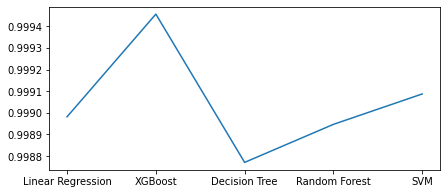

In [170]:
plt.figure(figsize=(7,3))
plt.plot(summary_df["Model"],summary_df["Accuracy"])
plt.show()

### Model 6  - KNN

In [153]:
# Takes a lot of time for training & also hyper paramter tuning. So most likely in real time this should not be used unless we have a good copute power. 
# However trying to model this to check the performance

In [154]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

In [155]:
neighbours = np.arange(1,5)
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

In [156]:
print(train_accuracy, test_accuracy)

[2.8084e-319 1.1364e-322 1.4328e-322 3.3102e-322] [2.8084e-319 1.1364e-322 1.4328e-322 3.3102e-322]


In [ ]:
#knn_predicted_test_labels=knn.predict(X_test)

In [ ]:
# taking a lot of time to execute.
#for i,k in enumerate(neighbours):
    
    #knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)    
    #knn.fit(X_train,y_train)
    #train_accuracy[i] = knn.score(X_train, y_train)
    #test_accuracy[i] = knn.score(X_test, y_test) 

In [ ]:
#from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
#knn_accuracy_score  = accuracy_score(y_test,knn_predicted_test_labels)
#knn_precison_score  = precision_score(y_test,knn_predicted_test_labels)
#knn_recall_score    = recall_score(y_test,knn_predicted_test_labels)
#knn_f1_score        = f1_score(y_test,knn_predicted_test_labels)

In [ ]:
#print("Accuracy",knn_accuracy_score)
#print("Precison",knn_precison_score)
#print("Recall",knn_recall_score)
#print("F1 Score",knn_f1_score)

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

In [171]:
#Random Oversampling

In [173]:
!pip install imblearn

In [174]:
from imblearn.over_sampling import RandomOverSampler

In [175]:
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [178]:
from collections import Counter
print('Imbalanced class',Counter(y_train))
print('Balanced class',Counter(y_train_ros))

Imbalanced class Counter({0: 227449, 1: 396})
Balanced class Counter({0: 227449, 1: 227449})


### Model 7  - Logistic Regression with Random Oversampling

In [179]:
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# choosing different values of C as a regulaization hyperparameter, the higher the value of C, lesser the regularization
params = {"C": [0.01, 0.1, 1, 10, 100]}

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, return_train_score=True,
             scoring='roc_auc', verbose=1)

### Print the class distribution after applying SMOTE 

In [ ]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = ___  #initialise the model with optimum hyperparameters
clf.fit( ) # fit on the balanced dataset
print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
print('Train auc =', metrics.roc_auc_score(_________)
fpr, tpr, thresholds = metrics.roc_curve(_________)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)